In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions, get_size_list_from_xte
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size

%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50_uniform10 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform10/validation_matrix.csv')
resnet50_uniform30 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30/validation_matrix.csv')
resnet50_uniform50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform50/validation_matrix.csv')
resnet50_uniform70 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform70/validation_matrix.csv')
resnet50_uniform90 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform90/validation_matrix.csv')

In [3]:
resnet50_uniform10_precisions = get_precisions(resnet50_uniform10)
resnet50_uniform30_precisions = get_precisions(resnet50_uniform30)
resnet50_uniform50_precisions = get_precisions(resnet50_uniform50)
resnet50_uniform70_precisions = get_precisions(resnet50_uniform70)
resnet50_uniform90_precisions = get_precisions(resnet50_uniform90)

In [4]:
exp_name = ["resnet50_uniform10", "resnet50_uniform30", "resnet50_uniform50", "resnet50_uniform70", "resnet50_uniform90"]
exp_ap = [resnet50_uniform10_precisions.mean(), 
          resnet50_uniform30_precisions.mean(), 
          resnet50_uniform50_precisions.mean(), 
          resnet50_uniform70_precisions.mean(), 
          resnet50_uniform90_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_ap": exp_ap})
df.index = exp_name
df

,exp_ap
resnet50_uniform10,0.875295
resnet50_uniform30,0.876958
resnet50_uniform50,0.876167
resnet50_uniform70,0.870925
resnet50_uniform90,0.880291


In [6]:
insect_names = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label = pd.DataFrame({"resnet50_uniform10": resnet50_uniform10_precisions, 
                             "resnet50_uniform30": resnet50_uniform30_precisions, 
                             "resnet50_uniform50": resnet50_uniform50_precisions, 
                             "resnet50_uniform70": resnet50_uniform70_precisions, 
                             "resnet50_uniform90": resnet50_uniform90_precisions,})
df_per_label.index = insect_names
df_per_label

,resnet50_uniform10,resnet50_uniform30,resnet50_uniform50,resnet50_uniform70,resnet50_uniform90
Diptera,0.916832,0.922772,0.936634,0.914851,0.914851
Ephemeridae,0.937063,0.902098,0.909091,0.881119,0.895105
Ephemeroptera,0.764505,0.784983,0.733788,0.726962,0.761092
Lepidoptera,0.945634,0.943987,0.939868,0.941516,0.942339
Plecoptera,0.849899,0.882353,0.858012,0.886410,0.898580
Trichoptera,0.837838,0.825553,0.879607,0.874693,0.869779


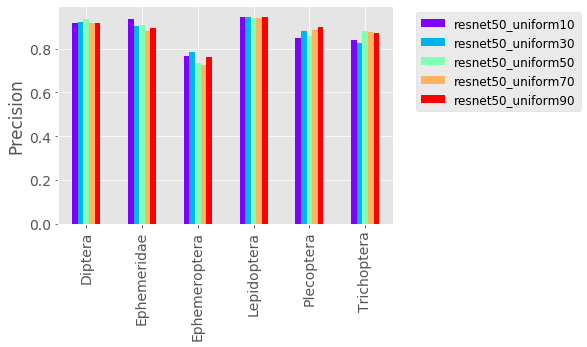

In [8]:
plt.rcParams["font.size"] = 14
df_per_label.plot(kind="bar", y=["resnet50_uniform10", "resnet50_uniform30", "resnet50_uniform50", "resnet50_uniform70", "resnet50_uniform90"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_uniform_width/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform10/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})
insect_size_df = insect_size_df.drop(insect_size_df.index[[0, 1]])

In [10]:
resnet50_uniform10 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform10/all_size_df.csv')
resnet50_uniform30 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30/all_size_df.csv')
resnet50_uniform50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform50/all_size_df.csv')
resnet50_uniform70 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform70/all_size_df.csv')
resnet50_uniform90 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform90/all_size_df.csv')

In [11]:
resnet50_uniform10 = resnet50_uniform10.drop(resnet50_uniform10.index[[0, 1]])
resnet50_uniform30 = resnet50_uniform30.drop(resnet50_uniform30.index[[0, 1]])
resnet50_uniform50 = resnet50_uniform50.drop(resnet50_uniform50.index[[0, 1]])
resnet50_uniform70 = resnet50_uniform70.drop(resnet50_uniform70.index[[0, 1]])
resnet50_uniform90 = resnet50_uniform90.drop(resnet50_uniform90.index[[0, 1]])

In [13]:
insect_size_df["Insect_size"] = resnet50_uniform10["Insect_size"]
insect_size_df

,order,count,Insect_size
2,7.0,12,205.833333
3,8.0,51,395.039216
4,9.0,131,776.328244
5,10.0,403,1572.317618
6,11.0,1004,2982.721116
7,12.0,740,5730.868919
8,13.0,431,11417.570766
9,14.0,260,23926.192308
10,15.0,21,35455.380952


In [14]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["resnet50_uniform10"] = resnet50_uniform10["Accuracy"]
all_df["resnet50_uniform30"] = resnet50_uniform30["Accuracy"]
all_df["resnet50_uniform50"] = resnet50_uniform50["Accuracy"]
all_df["resnet50_uniform70"] = resnet50_uniform70["Accuracy"]
all_df["resnet50_uniform90"] = resnet50_uniform90["Accuracy"]
all_df

,order,count,resnet50_uniform10,resnet50_uniform30,resnet50_uniform50,resnet50_uniform70,resnet50_uniform90
2,7.0,12,1.000000,1.000000,0.916667,0.916667,1.000000
3,8.0,51,0.882353,0.843137,0.803922,0.764706,0.803922
4,9.0,131,0.763359,0.793893,0.824427,0.809160,0.770992
5,10.0,403,0.794045,0.796526,0.791563,0.794045,0.808933
6,11.0,1004,0.870518,0.883466,0.881474,0.876494,0.890438
7,12.0,740,0.928378,0.927027,0.932432,0.936486,0.932432
8,13.0,431,0.969838,0.962877,0.960557,0.962877,0.969838
9,14.0,260,0.976923,0.976923,0.969231,0.973077,0.969231
10,15.0,21,0.904762,0.952381,0.952381,0.952381,0.952381


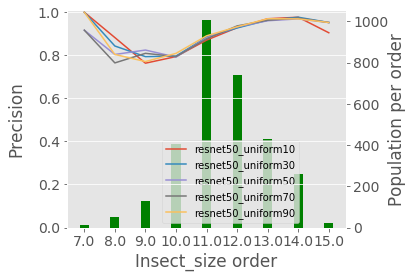

In [15]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50_uniform10"], label="resnet50_uniform10")
ax2.plot(x_label, all_df["resnet50_uniform30"], label="resnet50_uniform30")
ax2.plot(x_label, all_df["resnet50_uniform50"], label="resnet50_uniform50")
ax2.plot(x_label, all_df["resnet50_uniform70"], label="resnet50_uniform70")
ax2.plot(x_label, all_df["resnet50_uniform90"], label="resnet50_uniform90")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.85, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_uniform_width/compare_precision_distrib_of_size.png", bbox_inches="tight")